<a href="https://colab.research.google.com/github/sudarsana-reddy/ml-practice-repo/blob/main/ca_ml_linear_models_boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]
filepath = f'/content/{filename}'
print(filepath)


Saving boston.csv to boston.csv
/content/boston.csv


In [3]:
df = pd.read_csv(filepath)


In [4]:
from sklearn.model_selection import train_test_split


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
df.shape

(506, 14)

In [7]:
train_df.shape

(404, 14)

In [8]:
test_df.shape

(102, 14)

In [9]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(404, 13)

In [12]:
y_train.shape

(404,)

In [13]:
from sklearn.linear_model import LinearRegression
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)

LinearRegression()

In [14]:
r2_score = round(reg_all.score(X_train, y_train), 4)
print(f'r2 train score is {r2_score}')

r2 train score is 0.7509


In [15]:
y_pred = reg_all.predict(X_test)

In [16]:
r2_score_test = round(reg_all.score(X_test, y_test), 4)
print(f'r2 test score is {r2_score_test}')

r2 test score is 0.6688


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'mse is {mse}')

mse is 4.9286021826653075


In [18]:
error = y_test - y_pred
np.sqrt(np.mean(error**2))

4.9286021826653075

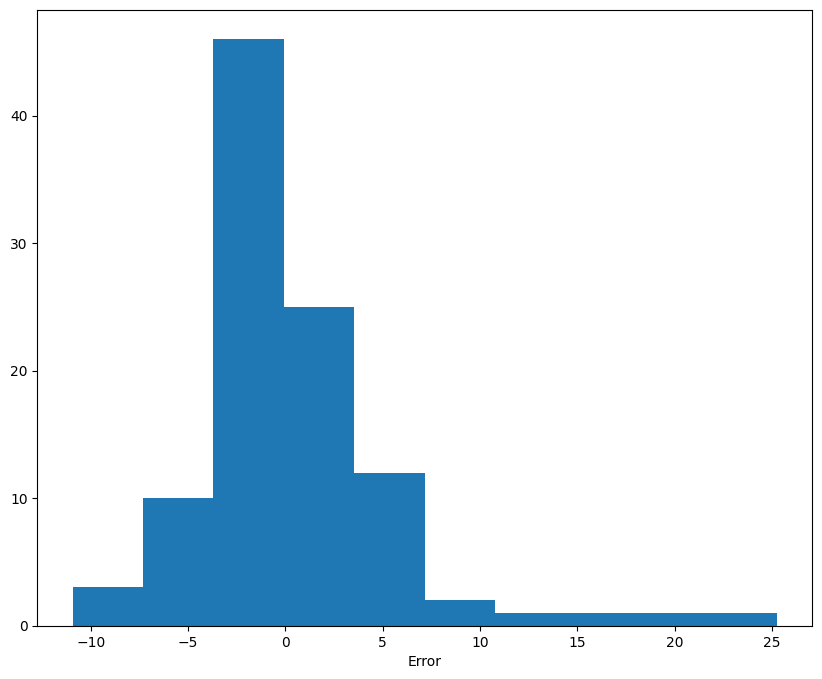

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
ax.hist(error)
ax.set_xlabel('Error')
plt.show()

<Axes: >

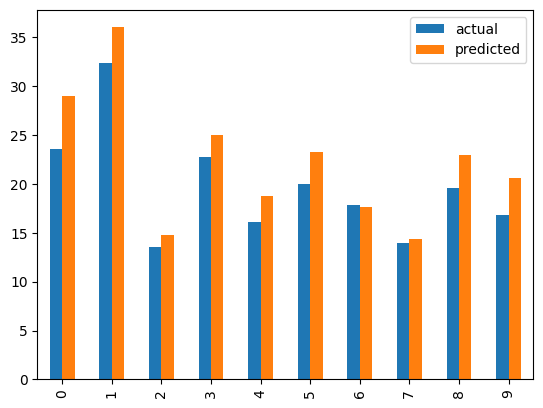

In [20]:
data_pred_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
}).reset_index(drop=True)
data_pred_df.head(10).plot(kind='bar')

<Axes: >

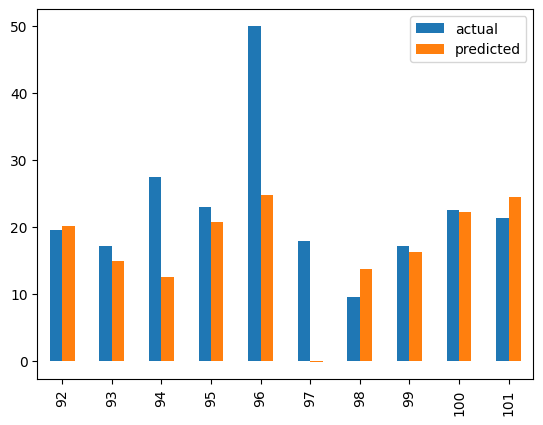

In [21]:
data_pred_df = pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
}).reset_index(drop=True)
data_pred_df.tail(10).plot(kind='bar')

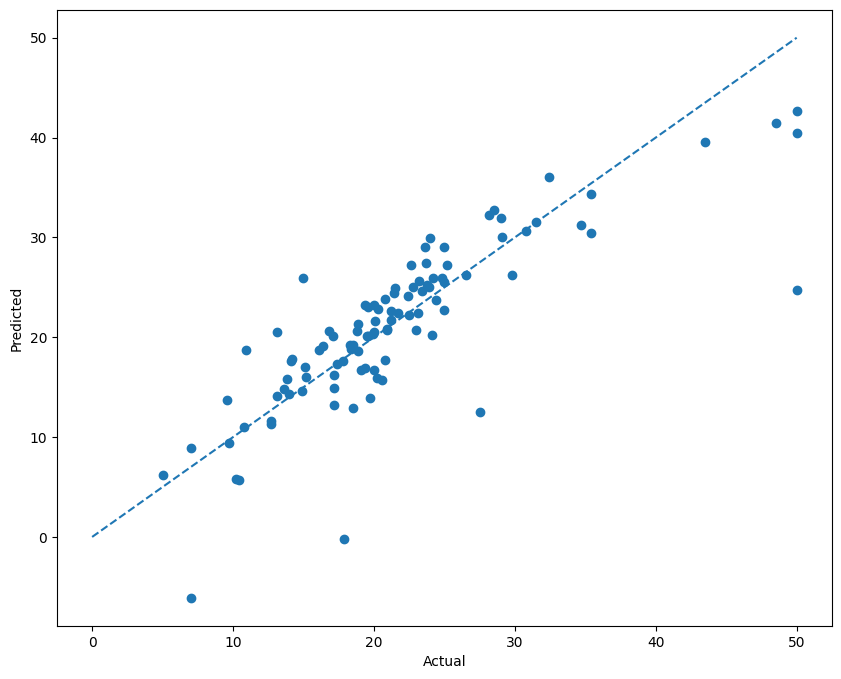

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(y_test, y_pred)
ax.plot([0,50], [0,50], linestyle='--')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

# **Cross-Validation Score**

In [23]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(reg_all, X_train, y_train, cv=10)
cv_scores

array([0.78005109, 0.79231329, 0.75452641, 0.29904458, 0.78702938,
       0.72324517, 0.84606865, 0.66835141, 0.79974401, 0.5362705 ])

In [24]:
cv_scores.mean()

0.6986644490108919

In [25]:
cvs = [5,8,10,15,20]
metrics_df = pd.DataFrame()
for cv in cvs:
  cv_scores = cross_val_score(reg_all, X_train, y_train, cv=cv)
  temp_df = pd.DataFrame()
  temp_df['cv'] = [cv]
  temp_df['mean_score'] = [cv_scores.mean()]
  # temp_df['std'] = [cv_scores.std()]
  metrics_df = pd.concat([metrics_df, temp_df])
metrics_df.reset_index(drop=True)

,cv,mean_score
0,5,0.724436
1,8,0.723505
2,10,0.698664
3,15,0.705553
4,20,0.682848
